# Spin and Zeeman effect

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import scipy.sparse as sparse

In [2]:
def matshow_cbar(mat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(mat)
    fig.colorbar(cax)

$$H=g_n μ_n \mathbf{B⋅I}+g_e μ_e \mathbf{B⋅S}+A\mathbf{I⋅S}$$

$$H=g_n μ_n (B_x I_x+B_y I_y+B_z I_z )+g_e μ_e (B_x S_x+B_y S_y+B_z S_z )+A(I_x S_x+I_y S_y+I_z S_z )$$

$$H= H_{zn} + H_{ze} + H_{hf}$$

$$H= H_z + H_{hf}$$


**B** is the magnetic field

**I** is the nuclear spin operator

**S** is the electron spin operator (= ℏ/2 σ) 

More info on the formulas can be found here:
https://easyspin.org/easyspin/documentation/hamiltonian.html

In [3]:
#Setting up some constants
e = 1.6e-19              # Electron charge (C)
h = 6.625e-34            # Planck constant (Js)

ge = 1.9987213544        # Electron Lande g factor
gn = -2.26               # Neutron Lande g factor
# BTW this is the same kind of g factor spoken about recently in the news (Fermilab-2021) but that is for a muon.

# The h_bar is included in the units of mu_B, mu_n and A
mu_B = 5.7962605e-5      # Bohr magnaton (eV/T)
mu_n = 3.156739525e-8    # Nuclear magneton (eV/T)

B = np.array([1, 1, 0])  # Magnetic field strength vector (Tesla)
A = 117e6                # Fermi contact hyperfine constant (Hz)
I =  np.diag([1]*2)      # Identity matrix

In [4]:
print(B)
print(I)

[1 1 0]
[[1 0]
 [0 1]]


In [5]:
# Spin matricies, Pauli matrices * 1/2, hbar is factored in later
X = 0.5*np.array([[0,1],[1,0]])
Y = 0.5*np.array([[0, -1j],[1j, 0]])
Z = 0.5*np.array([[1, 0], [0, -1]])

In [6]:
print(X)
print(Y)
print(Z)

[[0.  0.5]
 [0.5 0. ]]
[[0.+0.j  0.-0.5j]
 [0.+0.5j 0.+0.j ]]
[[ 0.5  0. ]
 [ 0.  -0.5]]


The tensor product is computationally the same as a knoneker product with an indetity matrix $\mathcal{I}$ so we will use that.

$$ I_x \Longrightarrow I_x \otimes \mathcal{I}$$
$$ S_x \Longrightarrow \mathcal{I} \otimes S_x$$

In reality it should be $I_x \otimes B_X$ however $B_x$ is a scalar so it works out the same as $I_x \otimes \mathcal{I}.

In [7]:
# Hamiltonian for the neutron (Nuclear Zeeman Interaction)
H_zn = gn*mu_n*(B[0]*np.kron(X, I)+B[1]*np.kron(Y, I)+ B[2]*np.kron(Z, I)) # (eV)
print(H_zn) 

[[-0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j
  -3.56711566e-08+3.56711566e-08j -0.00000000e+00+0.00000000e+00j]
 [-0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j
  -0.00000000e+00+0.00000000e+00j -3.56711566e-08+3.56711566e-08j]
 [-3.56711566e-08-3.56711566e-08j -0.00000000e+00+0.00000000e+00j
  -0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j]
 [-0.00000000e+00+0.00000000e+00j -3.56711566e-08-3.56711566e-08j
  -0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j]]


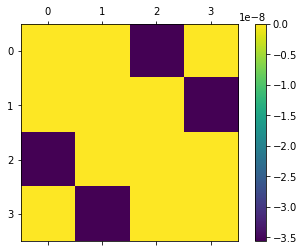

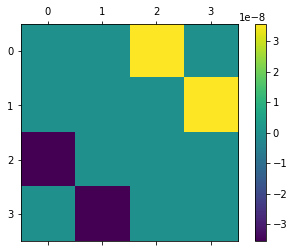

In [8]:
matshow_cbar(np.real(H_zn))
matshow_cbar(np.imag(H_zn))

In [9]:
# Hamiltonian for the electron (Electron Zeeman Interaction)
H_ze = ge*mu_B*(B[0]*np.kron(I, X)+B[1]*np.kron(I, Y)+ B[2]*np.kron(I, Z)) # eV

H_z = (H_zn + H_ze)*e/h # Hz

# Hamiltonian for the hyperfine interaction
H_hf = A*(np.kron(X, X) + np.kron(Y, Y) + np.kron(Z, Z)) # Hz

H = H_z + H_hf

In [10]:
# Step 4 - Generate Solution
vals, vecs = np.linalg.eigh(H)
# vals is the eigen values, vecs are the eigen vectors (as a matrix)

# Step 5 - extract and print
for i in range(len(vals)):
    print("[{}] \t Eigenvalues = {:.4E} \n \t Eigenvector = \n".format(i,vals[i]) + str(vecs[:,i]))

[0] 	 Eigenvalues = -1.9826E+10 
 	 Eigenvector = 
[ 4.99260687e-01-0.j         -3.54075392e-01-0.35407539j
  3.54075392e-01+0.35407539j -4.39436505e-18-0.49926069j]
[1] 	 Eigenvalues = -1.9743E+10 
 	 Eigenvector = 
[ 5.00000000e-01+0.j         -3.53553391e-01-0.35355339j
 -3.53553391e-01-0.35355339j  1.47844421e-17+0.5j       ]
[2] 	 Eigenvalues = 1.9767E+10 
 	 Eigenvector = 
[-5.00738222e-01-0.j         -3.53030617e-01-0.35303062j
  3.53030617e-01+0.35303062j  7.91187104e-17+0.50073822j]
[3] 	 Eigenvalues = 1.9801E+10 
 	 Eigenvector = 
[-5.00000000e-01+0.j         -3.53553391e-01-0.35355339j
 -3.53553391e-01-0.35355339j -1.04068394e-16-0.5j       ]


**Homework**

1. Visualise the Eigenvalues and eigenvectors
2. Modify the B field and observe changes in the eigenvalues and eigenvectors
3. Add another neutron to the hamiltonian

# Sparse martix and benchmarking

In [11]:
def forward_diff_mat(nodes):
    return np.diag([-2]*nodes,0) + np.diag([1]*(nodes-1),1) + np.diag([1]*(nodes-1),-1)

In [12]:
# Make our matrix and print it to see.
H = -20*forward_diff_mat(500)
print('Uncrompressed Matrix:')
print(H)

# Let's have a look at different sparse representations of this matrix.
H_csc = sparse.csc_matrix(H)
print('\nCompressed Sparse Column:')
print(H_csc)
H_csr = sparse.csr_matrix(H)
print('\nCompressed Sparse Row:')
print(H_csr)
H_dok = sparse.dok_matrix(H)
print('\nDictionary of Keys')
print(H_dok)
H_lil = sparse.lil_matrix(H)
print('\nList of Lists')
print(H_lil)


# There doesn't appear to be much difference *in the print out*, but there may be a lot going on behind the scenes.

Uncrompressed Matrix:
[[ 40 -20   0 ...   0   0   0]
 [-20  40 -20 ...   0   0   0]
 [  0 -20  40 ...   0   0   0]
 ...
 [  0   0   0 ...  40 -20   0]
 [  0   0   0 ... -20  40 -20]
 [  0   0   0 ...   0 -20  40]]

Compressed Sparse Column:
  (0, 0)	40
  (1, 0)	-20
  (0, 1)	-20
  (1, 1)	40
  (2, 1)	-20
  (1, 2)	-20
  (2, 2)	40
  (3, 2)	-20
  (2, 3)	-20
  (3, 3)	40
  (4, 3)	-20
  (3, 4)	-20
  (4, 4)	40
  (5, 4)	-20
  (4, 5)	-20
  (5, 5)	40
  (6, 5)	-20
  (5, 6)	-20
  (6, 6)	40
  (7, 6)	-20
  (6, 7)	-20
  (7, 7)	40
  (8, 7)	-20
  (7, 8)	-20
  (8, 8)	40
  :	:
  (491, 491)	40
  (492, 491)	-20
  (491, 492)	-20
  (492, 492)	40
  (493, 492)	-20
  (492, 493)	-20
  (493, 493)	40
  (494, 493)	-20
  (493, 494)	-20
  (494, 494)	40
  (495, 494)	-20
  (494, 495)	-20
  (495, 495)	40
  (496, 495)	-20
  (495, 496)	-20
  (496, 496)	40
  (497, 496)	-20
  (496, 497)	-20
  (497, 497)	40
  (498, 497)	-20
  (497, 498)	-20
  (498, 498)	40
  (499, 498)	-20
  (498, 499)	-20
  (499, 499)	40

Compressed Sparse Ro

In [13]:
# We can take any of our matrices and convert them to a 'regular' matrix format by calling the .todense function
H_normal = H_csr.todense()
# Back to a normal matrix:
print(H_normal)

[[ 40 -20   0 ...   0   0   0]
 [-20  40 -20 ...   0   0   0]
 [  0 -20  40 ...   0   0   0]
 ...
 [  0   0   0 ...  40 -20   0]
 [  0   0   0 ... -20  40 -20]
 [  0   0   0 ...   0 -20  40]]


Where the more interesting stuff comes in to play is when you try to modify / perform an operation with the sparse matrices: you can't really use normal numpy operations! Instead you need to use the spefic operations available as part of the spmatrix class: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.spmatrix.html#scipy.sparse.spmatrix

(They are called by putting a .METHOD() after the variable name, for example H_csr.get_shape())

In [14]:
# These are some sparse matrix example functions you can do on sparse matrices.
print("Calculating the mean value:")
print("Regular matrix representation")
print(np.mean(H))
print('\nCompressed Sparse Column:')
print(H_csc.mean())
print('\nCompressed Sparse Row:')
print(H_csr.mean())
print('\nList of Lists')
print(H_lil.mean())
print('\nDictionary of Keys')
print(H_dok.mean())

Calculating the mean value:
Regular matrix representation
0.00016

Compressed Sparse Column:
0.00015999999999999999

Compressed Sparse Row:
0.00015999999999999999

List of Lists
0.00016

Dictionary of Keys
0.00016


In [15]:
#timing something is pretty simple; you get a start time, a finish time, and subtract them from each other.
start = time.perf_counter()
for i in range(1000000):
    a = 1+2
end = time.perf_counter()

print('Time taken (s):')
print(end-start)

Time taken (s):
0.06603399999994508


In [16]:
# Let's time how long it takes to make a sparse representation of a matrix:
nodes = 10000
H = -20*forward_diff_mat(nodes)

print('Making a CSR sparse Matrix of size N = %s'% nodes)
start = time.perf_counter()
H_csr = sparse.csr_matrix(H)
end = time.perf_counter()
print('Time taken (s):')
print(end-start)

print('Making a LIL sparse Matrix of size N = %s'% nodes)
start = time.perf_counter()
H_lil = sparse.lil_matrix(H)
end = time.perf_counter()
print('Time taken (s):')
print(end-start)

Making a CSR sparse Matrix of size N = 10000
Time taken (s):
0.7451533999999356
Making a LIL sparse Matrix of size N = 10000
Time taken (s):
0.6517563000002156


In [23]:
Repeats = 1000

In [24]:
#doing some addition

print('Adding 2 ordinary Matricies of size N = %s'% nodes)
start = time.perf_counter()
for i in range(Repeats):
    a = H + H
end = time.perf_counter()
print('Time taken (s):')
print(end-start)

Adding 2 ordinary Matricies of size N = 10000
Time taken (s):
0.24462500000004184


In [25]:
print('Adding 2 CSR sparse Matricies of size N = %s'% nodes)
start = time.perf_counter()
for i in range(Repeats):
    a = H_csr + H_csr
end = time.perf_counter()
print('Time taken (s):')
print(end-start)

Adding 2 CSR sparse Matricies of size N = 10000
Time taken (s):
0.11788569999998799


In [26]:
print('Adding 2 LIL sparse Matricies of size N = %s'% nodes)
start = time.perf_counter()
for i in range(Repeats):
    a = H_lil + H_lil
end = time.perf_counter()
print('Time taken (s):')
print(end-start)

Adding 2 LIL sparse Matricies of size N = 10000
Time taken (s):
0.28673209999988103


In [27]:
# Let's see how large our representations are:

H = -20*forward_diff_mat(500)

print('Size of matrix (in MB):')
print(H.data.nbytes/(1024**2))

print('\nSize of CSR representation (in MB):')
H_csr = sparse.csr_matrix(H)
print(H_csr.data.nbytes/(1024**2))

print('\nSize of LIL representation (in MB):')
H_lil = sparse.lil_matrix(H)
print(H_lil.data.nbytes/(1024**2))

Size of matrix (in MB):
0.95367431640625

Size of CSR representation (in MB):
0.00571441650390625

Size of LIL representation (in MB):
0.003814697265625


**Beginner Tasks**
1. Create your own matrix (maybe 10x10) in a separate cell, and find the sparse representations of it. Try different shapes (i.e. lots of off diagonal terms, everything concentrated in one corner) and have a look at how the representations change.
2. Time how long it takes to sparse-ify a matrix of size 10,000 by 10,000 using the time.perf_counter() tool. Which method (CSR, CSC, LIL, DOK etc) is the quickest?
3. Repeat the above timings but for de-sparsing a matrix (using the matrix.todense() command). Which representation has the overall best time? Does it change depending on what type of matrix you use (i.e. heavily diagonal, completely full, identity matrix etc)?

**Intermediate Tasks**
1. Investigate the scaling properties of one sparse representation of your choosing. As a function of initial matrix size (N), determine:

    a. How strongly the time-to-compress and time-to-unpack change.
    
    b. How much the file size of the un-compressed and compressed matrix change.
    
    
2. For your chosen sparse representation, compare the timings of the following methods for calculating the dot product of two matrices:

    a. use np.dot() in the dense (i.e. regular) matrix representation
    
    b. compress both matrices to sparse matrices, and use the spmatrix.dot() representation, then uncompress.

**Advanced Tasks**
1. Repeat the intermediate tasks (rip) but change the values in the matrices to be of double precision. What are the differences?
1. Repeat the intermetiate timing tasks **again** but time multiple runs of the same method; is there much variability in how long certain operations take?